In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
forcing_data_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\LittleWashita\little_washita_2006_2012.csv"
data = pd.read_csv(forcing_data_path)
data.head()

,time,precip_rate,PET
0,2006-09-19 00:00:00,0.0,0.000161
1,2006-09-19 01:00:00,0.0,0.000161
2,2006-09-19 02:00:00,0.0,0.000161
3,2006-09-19 03:00:00,0.0,0.000161
4,2006-09-19 04:00:00,0.0,0.000161


In [4]:
data.tail()

,time,precip_rate,PET
52627,2012-09-19 19:00:00,0.0,0.000443
52628,2012-09-19 20:00:00,0.0,0.000443
52629,2012-09-19 21:00:00,0.0,0.000443
52630,2012-09-19 22:00:00,0.0,0.000443
52631,2012-09-19 23:00:00,0.0,0.000443


In [5]:
q_data_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\LittleWashita\test_sm_basinavg.csv"
q_data = pd.read_csv(q_data_path)
q_data.head()

,Time,Rainfall,Flow,Soil Moisture Content,Time Step,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge
0,2006-09-19 00:00:00,0.0,0.000061,0.179808,0,0,0,0,0,10.236540
1,2006-09-19 01:00:00,0.0,0.000060,0.179020,1,0,0,0,0,10.080798
2,2006-09-19 02:00:00,0.0,0.000059,0.178306,2,0,0,0,0,9.840104
3,2006-09-19 03:00:00,0.0,0.000058,0.177500,3,0,0,0,0,9.726837
4,2006-09-19 04:00:00,0.0,0.000058,0.176834,4,0,0,0,0,9.648966


In [6]:
q_data.tail()

,Time,Rainfall,Flow,Soil Moisture Content,Time Step,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge
52627,2012-09-19 19:00:00,0.0,3.349963e-07,0.085587,52627,0,0,0,0,0.055926
52628,2012-09-19 20:00:00,0.0,3.188826e-07,0.085209,52628,0,0,0,0,0.053236
52629,2012-09-19 21:00:00,0.0,2.972562e-07,0.085148,52629,0,0,0,0,0.049625
52630,2012-09-19 22:00:00,0.0,2.506112e-07,0.085863,52630,0,0,0,0,0.041838
52631,2012-09-19 23:00:00,0.0,2.374657e-07,0.085651,52631,0,0,0,0,0.039644


In [7]:
PET = data["PET"]/1000 #m/hr->mm/hr
len(PET)

52632

In [8]:
# Date = data["time"].str.replace("-", "")
Q = q_data["Flow"]/1000 #m/hr -> mm/hr
P = data["precip_rate"]/1000

,P[mm/hr],Q[mm/hr],PET[mm/hr]
time,,,
2006-09-19 00:00:00,0.0,6.131705e-08,1.611461e-07
2006-09-19 01:00:00,0.0,6.038414e-08,1.611461e-07
2006-09-19 02:00:00,0.0,5.894239e-08,1.611461e-07
2006-09-19 03:00:00,0.0,5.826392e-08,1.611461e-07
2006-09-19 04:00:00,0.0,5.779746e-08,1.611461e-07


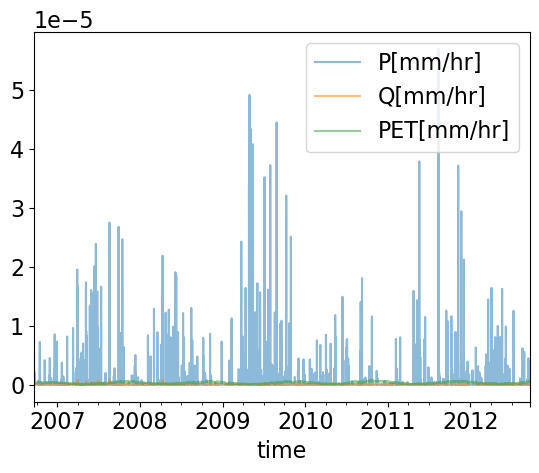

In [9]:
ptq = pd.DataFrame({"time": data["time"], "P[mm/hr]":P, "Q[mm/hr]":Q, "PET[mm/hr]":PET})
ptq["time"] = pd.to_datetime(ptq["time"])
ptq.set_index("time", inplace=True)
ptq.plot(alpha=0.5)
ptq.head()

In [10]:
T_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\LittleWashita\data_ars_temp2\ars_a156_TAIR.csv"

In [11]:
T_data = pd.read_csv(T_path)
T_data['time'] = np.nan
T_data['time'] = pd.to_datetime(T_data['datetime'])
T_data.set_index("time", inplace=True)
T_data.head()

,datetime,TAIR
time,,
2006-01-01 00:00:00,2006-01-01 00:00:00,15.200000
2006-01-01 01:00:00,2006-01-01 01:00:00,14.708333
2006-01-01 02:00:00,2006-01-01 02:00:00,13.750000
2006-01-01 03:00:00,2006-01-01 03:00:00,13.400000
2006-01-01 04:00:00,2006-01-01 04:00:00,14.241667


In [12]:
T_data.tail()

,datetime,TAIR
time,,
2010-11-30 20:00:00,2010-11-30 20:00:00,NaN
2010-11-30 21:00:00,2010-11-30 21:00:00,NaN
2010-11-30 22:00:00,2010-11-30 22:00:00,NaN
2010-11-30 23:00:00,2010-11-30 23:00:00,NaN
2010-12-01 00:00:00,2010-12-01 00:00:00,NaN


<AxesSubplot:xlabel='time'>

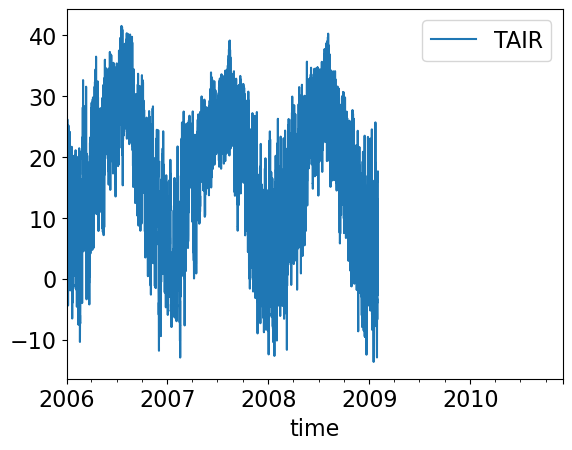

In [13]:
T_data.plot()

In [14]:
new_data = {
    'datetime': pd.date_range(start='2009-01-01', end='2012-12-31', freq='H'),
    'TAIR': T_data['TAIR'][:35041].values
}
new_df = pd.DataFrame(new_data)
new_df['time'] = pd.to_datetime(new_df['datetime'])
new_df.set_index("time", inplace=True)
new_df.head()

,datetime,TAIR
time,,
2009-01-01 00:00:00,2009-01-01 00:00:00,15.200000
2009-01-01 01:00:00,2009-01-01 01:00:00,14.708333
2009-01-01 02:00:00,2009-01-01 02:00:00,13.750000
2009-01-01 03:00:00,2009-01-01 03:00:00,13.400000
2009-01-01 04:00:00,2009-01-01 04:00:00,14.241667


<AxesSubplot:xlabel='time'>

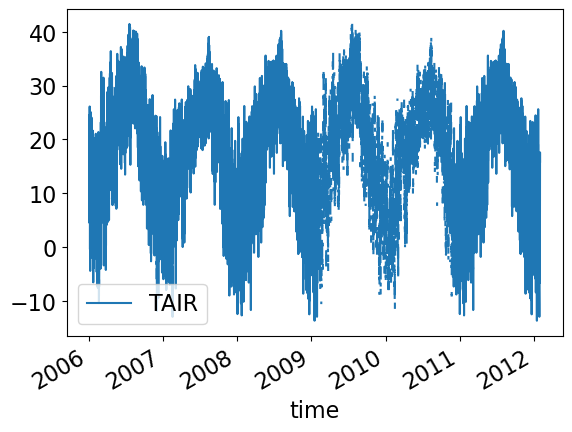

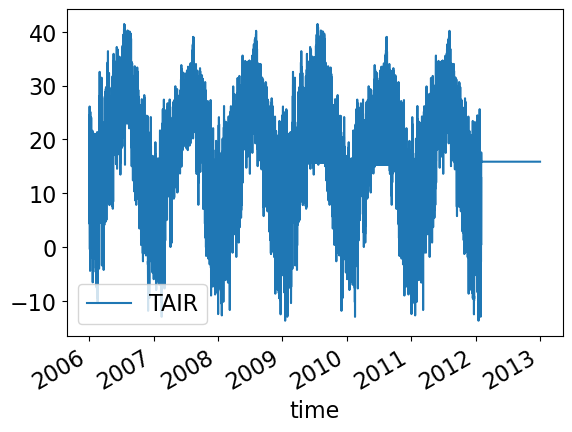

In [15]:
result_df = pd.concat([T_data, new_df])
result_df.plot()
result_df['TAIR'] = result_df['TAIR'].interpolate(method='linear')
result_df.plot()

In [16]:
ptq

,P[mm/hr],Q[mm/hr],PET[mm/hr]
time,,,
2006-09-19 00:00:00,0.0,6.131705e-08,1.611461e-07
2006-09-19 01:00:00,0.0,6.038414e-08,1.611461e-07
2006-09-19 02:00:00,0.0,5.894239e-08,1.611461e-07
2006-09-19 03:00:00,0.0,5.826392e-08,1.611461e-07
2006-09-19 04:00:00,0.0,5.779746e-08,1.611461e-07
...,...,...,...
2012-09-19 19:00:00,0.0,3.349963e-10,4.433171e-07
2012-09-19 20:00:00,0.0,3.188826e-10,4.433171e-07
2012-09-19 21:00:00,0.0,2.972562e-10,4.433171e-07


<AxesSubplot:xlabel='time'>

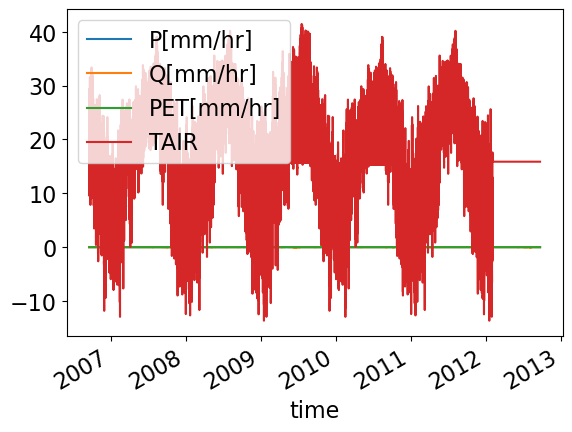

In [17]:
merged_df = ptq.merge(result_df, on='time', how='left')
merged_df.plot()

In [18]:
merged_df["2006-09-19 00:00:00":"2011-09-19 23:00:00"]

,P[mm/hr],Q[mm/hr],PET[mm/hr],datetime,TAIR
time,,,,,
2006-09-19 00:00:00,0.0,6.131705e-08,1.611461e-07,2006-09-19 00:00:00,13.341667
2006-09-19 01:00:00,0.0,6.038414e-08,1.611461e-07,2006-09-19 01:00:00,12.225000
2006-09-19 02:00:00,0.0,5.894239e-08,1.611461e-07,2006-09-19 02:00:00,12.583333
2006-09-19 03:00:00,0.0,5.826392e-08,1.611461e-07,2006-09-19 03:00:00,11.183333
2006-09-19 04:00:00,0.0,5.779746e-08,1.611461e-07,2006-09-19 04:00:00,10.516667
...,...,...,...,...,...
2011-09-19 19:00:00,0.0,NaN,5.133638e-07,2011-09-19 19:00:00,18.291667
2011-09-19 20:00:00,0.0,NaN,5.133638e-07,2011-09-19 20:00:00,17.775000
2011-09-19 21:00:00,0.0,NaN,5.133638e-07,2011-09-19 21:00:00,16.066667


,P[mm/hr],Q[mm/hr],PET[mm/hr],TAIR
time,,,,
2006-09-19 00:00:00,0.0,6.131705e-08,1.611461e-07,13.341667
2006-09-19 01:00:00,0.0,6.038414e-08,1.611461e-07,12.225000
2006-09-19 02:00:00,0.0,5.894239e-08,1.611461e-07,12.583333
2006-09-19 03:00:00,0.0,5.826392e-08,1.611461e-07,11.183333
2006-09-19 04:00:00,0.0,5.779746e-08,1.611461e-07,10.516667
...,...,...,...,...
2012-09-19 19:00:00,0.0,3.349963e-10,4.433171e-07,15.866667
2012-09-19 20:00:00,0.0,3.188826e-10,4.433171e-07,15.866667
2012-09-19 21:00:00,0.0,2.972562e-10,4.433171e-07,15.866667


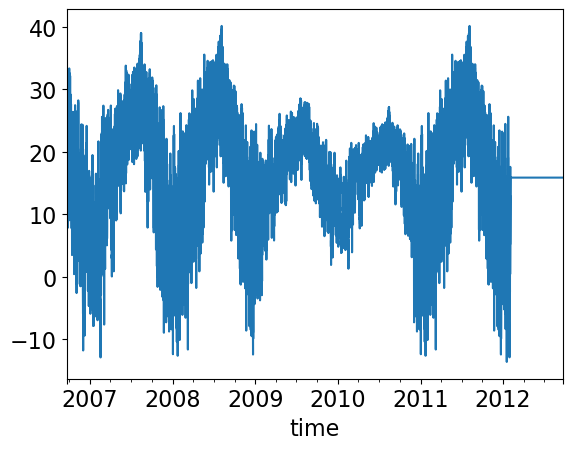

In [19]:
date_rng = pd.date_range(start='2006-09-19 00:00:00', end='2012-09-19 23:00:00', freq='H')
resampled_df = merged_df.resample('H').mean() 
resampled_df['Q[mm/hr]'].interpolate(method='linear', inplace=True)
resampled_df['P[mm/hr]'].interpolate(method='linear', inplace=True)
resampled_df['TAIR'].interpolate(method='linear', inplace=True)
resampled_df['TAIR'].plot()
resampled_df

<AxesSubplot:xlabel='time'>

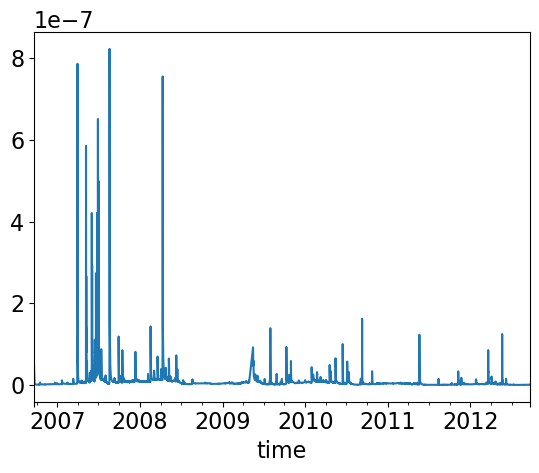

In [20]:
resampled_df['Q[mm/hr]'].plot()

<AxesSubplot:xlabel='time'>

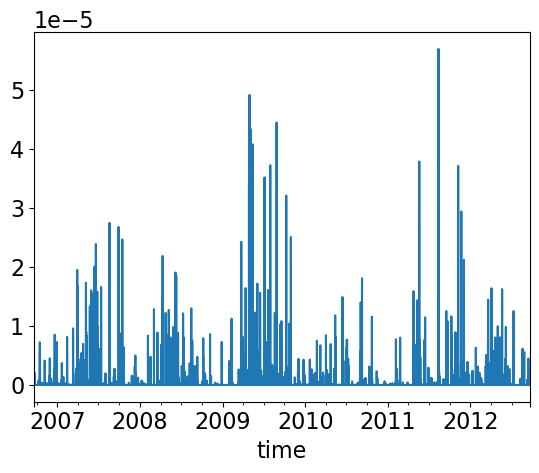

In [21]:
resampled_df['P[mm/hr]'].plot()

<AxesSubplot:xlabel='time'>

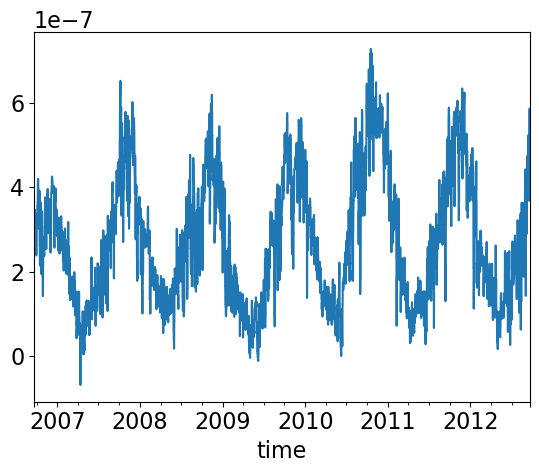

In [22]:
resampled_df['PET[mm/hr]'].plot()

In [23]:
output_df = resampled_df["2006-09-19 00:00:00":"2011-09-19 23:00:00"].copy()

In [29]:
output_path = r"C:\Program Files (x86)\HBV-light\Data\LittleWashita\data"
file_path = os.path.join(output_path, "EVAP.txt")
with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("EVAP\n")
    # Save the DataFrame as tab-delimited data, excluding the index
output_df['PET[mm/hr]'].to_csv(os.path.join(output_path, "EVAP.txt"), header=None, index=None, mode='a')
output_df['PET[mm/hr]'].size

43848

In [25]:
output_df['Date'] = output_df.index.strftime('%Y%m%d %HH:%mm:%ss')
output_df['Date'] = output_df['Date'].str.replace("-", "")
output_df


,P[mm/hr],Q[mm/hr],PET[mm/hr],TAIR,Date
time,,,,,
2006-09-19 00:00:00,0.0,6.131705e-08,1.611461e-07,13.341667,20060919 00:00:00
2006-09-19 01:00:00,0.0,6.038414e-08,1.611461e-07,12.225000,20060919 01:00:00
2006-09-19 02:00:00,0.0,5.894239e-08,1.611461e-07,12.583333,20060919 02:00:00
2006-09-19 03:00:00,0.0,5.826392e-08,1.611461e-07,11.183333,20060919 03:00:00
2006-09-19 04:00:00,0.0,5.779746e-08,1.611461e-07,10.516667,20060919 04:00:00
...,...,...,...,...,...
2011-09-19 19:00:00,0.0,3.601772e-10,5.133638e-07,18.291667,20110919 19:00:00
2011-09-19 20:00:00,0.0,3.592705e-10,5.133638e-07,17.775000,20110919 20:00:00
2011-09-19 21:00:00,0.0,3.583638e-10,5.133638e-07,16.066667,20110919 21:00:00


In [26]:
file_path = os.path.join(output_path, "ptq.txt")
with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("Little Washita\n")
    # Save the DataFrame as tab-delimited data, excluding the index
output_df[["Date", "P[mm/hr]", "TAIR", "Q[mm/hr]"]].to_csv(file_path, index=None, sep='\t', mode='a')

In [27]:
output_df["TAIR"].to_csv(os.path.join(output_path, "t_mean.txt"), index=None, sep='\t', header=None)

In [28]:
output_df["TAIR"]

time
2006-09-19 00:00:00    13.341667
2006-09-19 01:00:00    12.225000
2006-09-19 02:00:00    12.583333
2006-09-19 03:00:00    11.183333
2006-09-19 04:00:00    10.516667
                         ...    
2011-09-19 19:00:00    18.291667
2011-09-19 20:00:00    17.775000
2011-09-19 21:00:00    16.066667
2011-09-19 22:00:00    14.958333
2011-09-19 23:00:00    14.141667
Freq: H, Name: TAIR, Length: 43848, dtype: float64